In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import asyncio
import time
import astrolab_functions.astrolab_functions as func

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


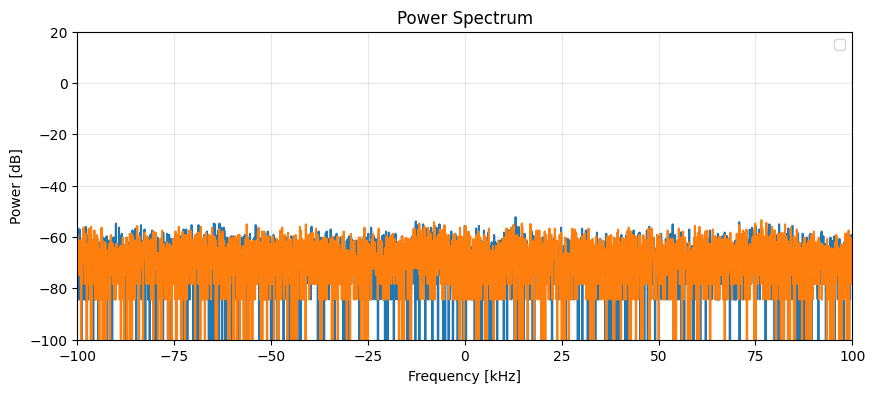

In [12]:
# Single Power Spectrum Create

fs = 1e6
file = "lab2_data/horn_galaxy.npz"

plt.figure(figsize=(10,4))

arr = func.load_file(file)
x = arr[1].astype(float)
N = len(x)

V = np.fft.fft(x)/N
f = np.fft.fftfreq(N, d=1/fs)

V = np.fft.fftshift(V)
f = np.fft.fftshift(f)

P = np.abs(V)**2
PdB = 10*np.log10(P + 1e-30)

plt.plot((f)/1e3, PdB)

plt.xlim(-100, 100)
plt.ylim(-100, 20)
plt.xlabel("Frequency [kHz]")
plt.ylabel("Power [dB]")
plt.title("Power Spectrum")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

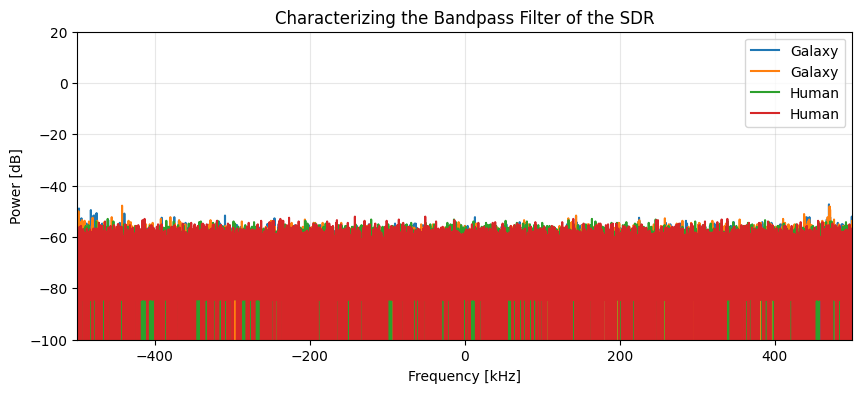

In [15]:
# Multiple Power Spectrum Create

fs = 1e6
files = [
    ("Galaxy",  "lab2_data/horn_galaxy.npz"),
    ("Human",  "lab2_data/horn_human2.npz"),
    # ("Anti-aliasing Filter ON (400 kHz)", "sdr_bp/Z0_400_kHz_bp.npz"),
]

plt.figure(figsize=(10,4))

for label, fn in files:
    arr = func.load_file(fn)
    x = arr[1].astype(float)
    N = len(x)

    V = np.fft.fft(x)/N
    f = np.fft.fftfreq(N, d=1/fs)

    V = np.fft.fftshift(V)
    f = np.fft.fftshift(f)

    P = np.abs(V)**2
    PdB = 10*np.log10(P + 1e-30)

    plt.plot((f)/1e3, PdB, label=label)

plt.xlim(-500, 500)
plt.ylim(-100, 20)
plt.xlabel("Frequency [kHz]")
plt.ylabel("Power [dB]")
plt.title("Characterizing the Bandpass Filter of the SDR")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()